In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import chess
from sarfa import core, BoardVisualization, SarfaBaseline, Engine, AddPerturber
from utils import get_all_pos
from IPython.display import Image, display
from collections import defaultdict

In [6]:
def saliency_algorithm_empty_spaces(fen, action=None) -> dict[str, float]:
    board = chess.Board(fen)

    saliency_results: dict[str, float] = defaultdict(int)
    perturber = AddPerturber(board)
    saliency_calculator = SarfaBaseline(engine, board)
    optimal_move_original_board = action

    for perturbed_board, perturbed_position_str in perturber.process():
        sarfa_compute_result = saliency_calculator.compute(perturbed_board, 
        action)
        saliency = sarfa_compute_result.saliency
        optimal_move = sarfa_compute_result.optimal_move

        if (optimal_move_original_board == None):
            optimal_move_original_board = chess.Move.from_uci(optimal_move)
        
        saliency_results[perturbed_position_str] = saliency

    return saliency_results, optimal_move_original_board

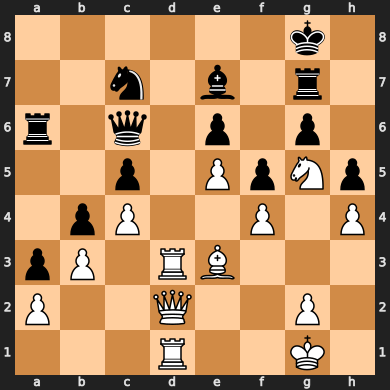

In [7]:
FEN = '6k1/2n1b1r1/r1q1p1p1/2p1PpNp/1pP2P1P/pP1RB3/P2Q2P1/3R2K1 w - - 0 1'
board = chess.Board(FEN)
engine = Engine("./stockfish_15_x64_avx2")
board_visualization = BoardVisualization(board)
board_visualization.only_board()

In [8]:
saliency_results, optimal_move = saliency_algorithm_empty_spaces(FEN)

In [9]:
saliency_results

defaultdict(int,
            {'a1': 0.0368895806682915,
             'a4': 0.003781469254979472,
             'a5': 0.1489163283370453,
             'a7': 0.25897391884858895,
             'a8': 0.1510798436542903,
             'b1': 0.16796504782102292,
             'b2': 0.4775888627737872,
             'b5': 0.1317081114649315,
             'b6': 0,
             'b7': 0.07969325730642353,
             'b8': 0.3215394888068388,
             'c1': 0.17549413336993525,
             'c2': 0,
             'c3': 0.4009528201261573,
             'c8': 0.4007622046625444,
             'd4': 0.31951866017345065,
             'd5': 0.18298288087921233,
             'd6': 0.4213729373583949,
             'd7': 0,
             'd8': 0.42080474110436633,
             'e1': 0.23202995952170713,
             'e2': 0.2521700034017237,
             'e4': 0.08275243031143886,
             'e8': 0,
             'f1': 0.31914278314674605,
             'f2': 0.006889437725407938,
             'f3': 0,
 

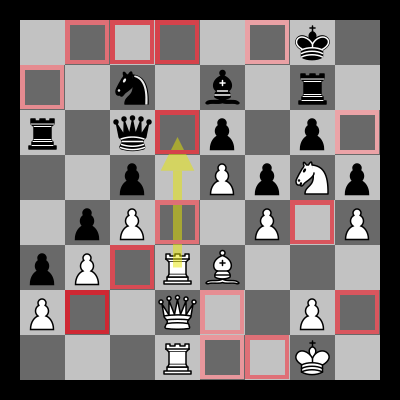

In [11]:
path = board_visualization.show_heatmap(saliency_results, optimal_move)
display(Image(path))